In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
boston = pd.read_csv('boston_listings.csv', index_col='id')
seattle = pd.read_csv('seattle_listings.csv', index_col='id')
print(boston.shape)
print(seattle.shape)

(3845, 105)
(7505, 105)


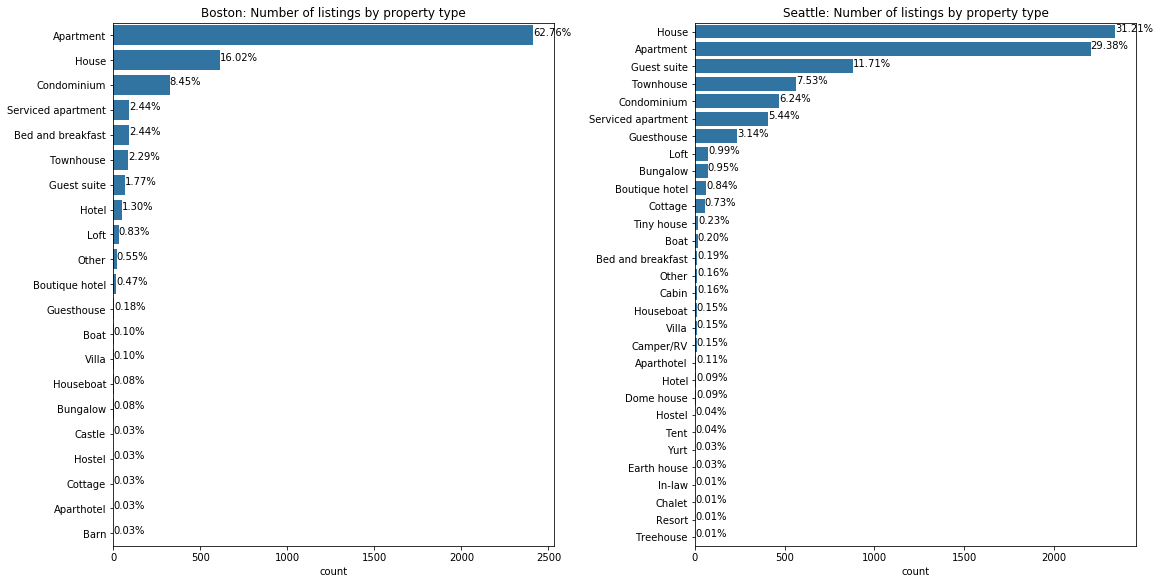

In [3]:
def count_plot_by_property_type(ax, df, title):
    """
    Plot the number counts of each property types, also show the count percentage of
    total properties listed
    Args:
        ax: Axis of the plot/subplot
        df: dataframe of Boston or Seattle listings
        title: the plot/subplot title to distingish between different datasets
    Returns:
        None
    """
    property_type_order = df['property_type'].value_counts().index.values
    ax.set_title(title)
    sns.countplot(y='property_type', data=df, order=property_type_order,
                  color=sns.color_palette()[0], ax=ax);
    for p in ax.patches:
        percentage = f"{100 * p.get_width()/df.shape[0]:.2f}%"
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    ax.set_ylabel(None)

fig, axes = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(16, 8)
count_plot_by_property_type(axes[0], boston, 'Boston: Number of listings by property type')
count_plot_by_property_type(axes[1], seattle, 'Seattle: Number of listings by property type')

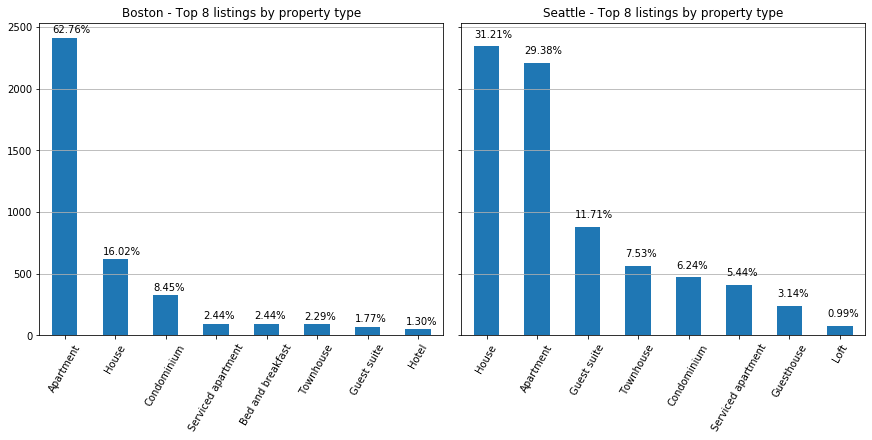

In [4]:
def plot_top_n_listings_by_property_type(n, ax, df, title):
    """
    Plot the n number of most listings by property types, also show the count percentage of
    total properties listed
    Args:
        n: the number of property types to plot
        ax: Axis of the plot/subplot
        df: dataframe of Boston or Seattle listings
        title: the plot/subplot title to distingish between different datasets
    Returns:
        None
    """
    df.property_type.value_counts()[:n].plot.bar(title=title, rot=60, ax=ax);
    ax.grid(axis='y')
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/df.shape[0]:.2f}%"
        x = p.get_x()
        y = p.get_y() + p.get_height() + df.shape[0]*0.01
        ax.annotate(percentage, (x, y))
    ax.set_ylabel(None)

fig, axes = plt.subplots(1,2, constrained_layout=True, sharey=True)
fig.set_size_inches(12, 6)
plot_top_n_listings_by_property_type(8, axes[0], boston, "Boston - Top 8 listings by property type")
plot_top_n_listings_by_property_type(8, axes[1], seattle, "Seattle - Top 8 listings by property type")

In [5]:
def change_price_to_float(df):
    """
    Change the listing price type from object to float, so we can operate on number type
    Args:
        df: the dataframe of Boston or Seattle listings
    Returns:
        df: the dataframe with price column changed to float type
    """
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    return df

boston = change_price_to_float(boston)
seattle = change_price_to_float(seattle)

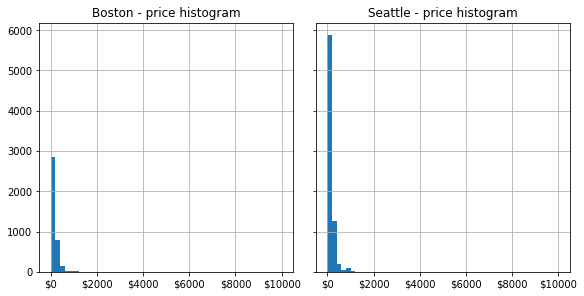

In [6]:
def compare_price_dist():
    """
    Compare the listed price distrubution between Boston and Seattle
    """
    fig, axes = plt.subplots(1,2, constrained_layout=True, sharey=True)
    fig.set_size_inches(8, 4)
    axes[0].set_title('Boston - price histogram')
    axes[1].set_title('Seattle - price histogram')
    formatter = ticker.FormatStrFormatter('$%1.0f')
    axes[0].xaxis.set_major_formatter(formatter)
    axes[0].grid(axis='y')
    axes[1].xaxis.set_major_formatter(formatter)
    axes[1].grid(axis='y')
    boston['price'].hist(ax=axes[0], bins=50)
    seattle['price'].hist(ax=axes[1], bins=50)
#     sns.distplot(boston['price'], ax=axes[0], norm_hist=True, bins=50);
#     sns.distplot(seattle['price'], ax=axes[1], norm_hist=True, bins=50);
    
compare_price_dist()

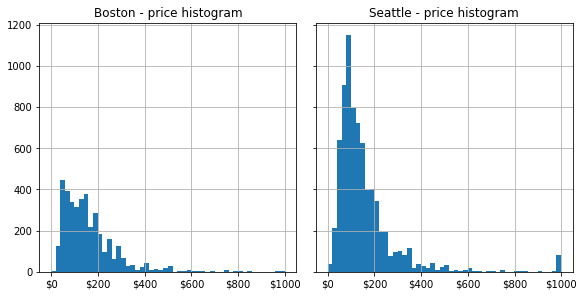

In [7]:
boston = boston[(boston['price'] < 1000)]
seattle = seattle[(seattle['price'] < 1000)]
compare_price_dist()

In [8]:
print(f"Boston listed properties with price > $500:  "
      f"{(boston['price'] > 500).sum() / boston.shape[0] * 100:.1f}%")
print(f"Seattle listed properties with price > $500: "
      f"{(seattle['price'] > 500).sum() / seattle.shape[0] * 100:.1f}%")

Boston listed properties with price > $500:  1.6%
Seattle listed properties with price > $500: 2.3%


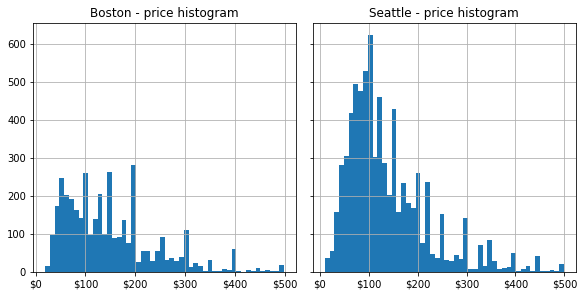

In [9]:
boston = boston[(boston['price'] > 0) & (boston['price'] < 500)]
seattle = seattle[(seattle['price'] > 0) & (seattle['price'] < 500)]
compare_price_dist()

In [10]:
print("Boston airbnb list prices:")
print(f"Average price:            ${boston['price'].mean():.2f}")
print(f"Median price:             ${boston['price'].median():.2f}")
print(f"Price standard diviation: ${boston['price'].std():.2f}")
print()
print("Seattle airbnb list prices:")
print(f"Average price:            ${seattle['price'].mean():.2f}")
print(f"Median price:             ${seattle['price'].median():.2f}")
print(f"Price standard deviation: ${seattle['price'].std():.2f}")

Boston airbnb list prices:
Average price:            $149.03
Median price:             $130.00
Price standard diviation: $90.87

Seattle airbnb list prices:
Average price:            $138.48
Median price:             $115.00
Price standard deviation: $85.26


Since we know that prices in Boston fluctuate more, further exlploring the location or neighborhood might help us to understand more about the data. First we want to exclude the neighborhoods where the listings are too few

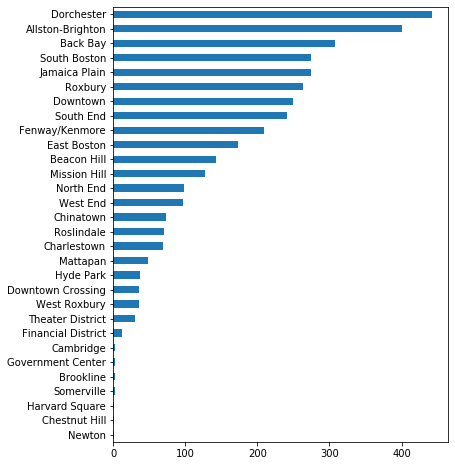

In [11]:
boston['neighbourhood'].value_counts().sort_values().plot.barh(figsize=(6,8));

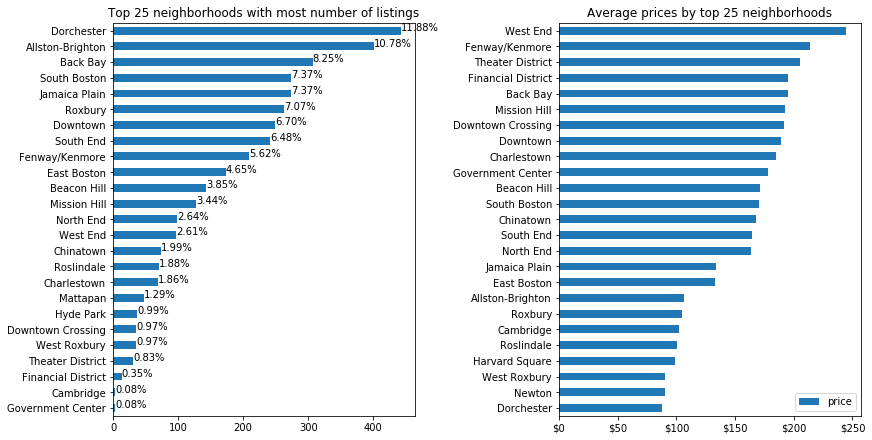

In [12]:
fig, axes = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(12, 6)

# Top 25 number of listings by neighbourhood
top_25_neighborhood = boston['neighbourhood'].value_counts().head(25).sort_values()
top_25_neighborhood.plot.barh(
    title='Top 25 neighborhoods with most number of listings', ax=axes[0]);
for p in axes[0].patches:
    percentage = f"{100 * p.get_width()/top_25_neighborhood.sum():.2f}%"
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    axes[0].annotate(percentage, (x, y))
axes[0].set_ylabel(None)

# Top 25 average price by neighbourhood in USD
boston[['neighbourhood', 'price']].groupby('neighbourhood').mean().sort_values('price').tail(25).plot.barh(
    title='Average prices by top 25 neighborhoods', ax=axes[1])

formatter = ticker.FormatStrFormatter('$%1.0f')
axes[1].xaxis.set_major_formatter(formatter);
axes[1].set_ylabel(None);

From above we see the number of property listings in Boston various by neighbourhood. The Dorchester area ranke first as number of airbnb properties available with over 400, and their prices are lowest with less than $100 in Boston. 

On the other hand, if you are look for a higer end property then Back Bay area should be the best choice because it is in the top 3 number of listings with over 300, and it is on the top 4 list most expensive price with above $200.

There are some property types that counts less than 1% of total listed properties, those are considered to be noisy types

Some properties with very high list price, some of them seems to be due to error. For example, property id=475254 has a list price of \$6,000, but following the listing_url of [https://www.airbnb.com/rooms/475254] the site show the price as \$146 per night. 

The list properties over \$500 only counts about 2\% of total number of property lists, I excluded all rows with price greater than \$500